Monty Hall

In [46]:
from numpy.random import randint, choice
from numpy import delete, arange
import matplotlib.pyplot as plt

In [28]:
N=10000000
switcher_wins=0
conservative_wins=0
newcomer_wins=0

for _ in range(N):

    initial_door_choice=randint(0,3)
    open_door=randint(1,3)
    while open_door == initial_door_choice:
        open_door=randint(1,3)

    new_door_choice=randint(0,3)  
    while new_door_choice==open_door or new_door_choice==initial_door_choice:
        new_door_choice=randint(0,3)  

    newcomer_door_choice=randint(0,3)
    while newcomer_door_choice==open_door:
        newcomer_door_choice=randint(0,3)

    if new_door_choice==0:
        switcher_wins=switcher_wins+1
    
    if initial_door_choice==0:
        conservative_wins=conservative_wins+1
    
    if newcomer_door_choice==0:
        newcomer_wins=newcomer_wins+1
        

print(f'Switcher won {switcher_wins/N*100}% of the times')
print(f'Conservative won {conservative_wins/N*100}% of the times')
print(f'Newcomer won {newcomer_wins/N*100}% of the times')
    

Switcher won 66.66056% of the times
Conservative won 33.339439999999996% of the times
Newcomer won 50.017089999999996% of the times


In [43]:
def monty_hall(N=3, M=1, N_trial=100000):

    if N-2<M:
        raise(ValueError)
    
    switcher_wins=0
    conservative_wins=0
    newcomer_wins=0

    for _ in range(N_trial):

        initial_door_choice=randint(0,N)
        open_doors=choice(delete(arange(0,N), [initial_door_choice, 0]), size=M, replace=False) #choose M number without repetition between 1 and N, excluding the initial door choice
        
        new_door_choice= choice(delete(arange(0,N), open_doors))
        while new_door_choice==initial_door_choice:
            new_door_choice= choice(delete(arange(0,N), open_doors))
              
        newcomer_door_choice=choice(delete(arange(0,N), open_doors))

        if new_door_choice==0:
            switcher_wins=switcher_wins+1
        
        if initial_door_choice==0:
            conservative_wins=conservative_wins+1
        
        if newcomer_door_choice==0:
            newcomer_wins=newcomer_wins+1
            
        
    return switcher_wins/N_trial*100, conservative_wins/N_trial*100, newcomer_wins/N_trial*100

        

In [45]:
N=100
prob_conservative=[]
prob_switcher=[]

for M in range(1, N-1):
    print(f'Processing M={M}')
    p1, p2, _=monty_hall(N=N, M=M, N_trial=10000)
    prob_switcher.append(p1)
    prob_conservative.append(p2)


Processing M=1
Processing M=2
Processing M=3
Processing M=4
Processing M=5
Processing M=6
Processing M=7
Processing M=8
Processing M=9
Processing M=10
Processing M=11
Processing M=12
Processing M=13
Processing M=14
Processing M=15
Processing M=16
Processing M=17
Processing M=18
Processing M=19
Processing M=20
Processing M=21
Processing M=22
Processing M=23
Processing M=24
Processing M=25
Processing M=26
Processing M=27
Processing M=28
Processing M=29
Processing M=30
Processing M=31
Processing M=32
Processing M=33
Processing M=34
Processing M=35
Processing M=36
Processing M=37
Processing M=38
Processing M=39
Processing M=40
Processing M=41
Processing M=42
Processing M=43
Processing M=44
Processing M=45
Processing M=46
Processing M=47
Processing M=48
Processing M=49
Processing M=50
Processing M=51
Processing M=52
Processing M=53
Processing M=54
Processing M=55
Processing M=56
Processing M=57
Processing M=58
Processing M=59
Processing M=60
Processing M=61
Processing M=62
Processing M=63
P

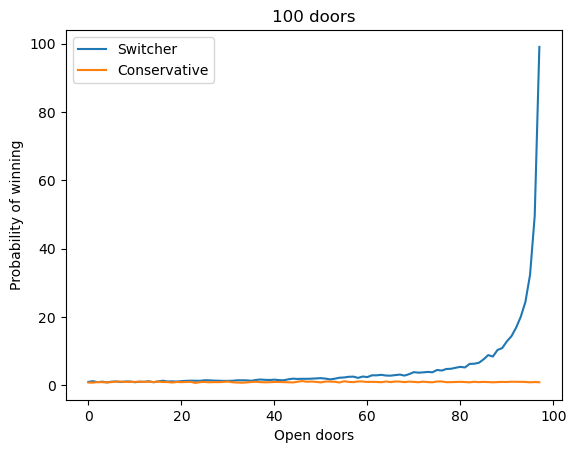

In [50]:
plt.plot(prob_switcher, label='Switcher')
plt.plot(prob_conservative, label='Conservative')
plt.title('100 doors')
plt.xlabel('Open doors')
plt.ylabel('Probability of winning')
plt.legend()
plt.show()